# Author : Devrishi Goswami

## Task 2: Prediction using Unsupervised ML

## GRIP@TheSparksFoundation

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

In [1]:
#Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Storing data from csv using read_csv()
data = pd.read_csv('Iris.csv')

In [3]:
#Using head() for printing first five rows and columns
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


---

In [4]:
#To check the data for any missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Find out the total numbers of rows and columns in our data
data.shape

(150, 6)

In [7]:
# For statistical summary 
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


---

In [8]:
#iloc() used for selecting particular values from rows and column 
X= data.iloc[:,1:5].values

In [9]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
# Importing cluster libraries
from sklearn.cluster import KMeans

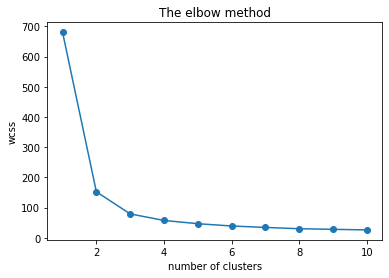

In [11]:
#Elbow method used for finding out the required number of clusters.
wcss =[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

#### The optimum number of clusters: 3

In [12]:
kmeans= KMeans(n_clusters=3, init='k-means++',max_iter=300, n_init=10,random_state=0)
kmeans= kmeans.fit(X)

In [13]:
Cluster_table= data.iloc[:,1:6]
Cluster_table['Clusters'] = kmeans.fit_predict(X)

In [14]:
Cluster_table

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


### Visualizing the clusters

[Text(0, 0.5, 'Sepal_Width_Cm'), Text(0.5, 0, 'Sepal_Length_Cm')]

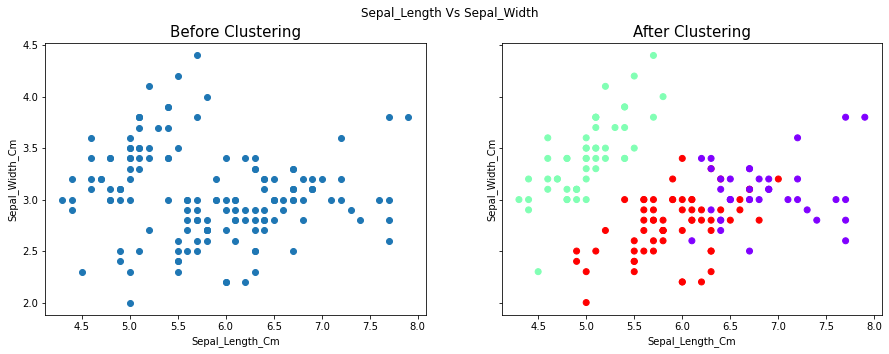

In [15]:
#Visualizing Sepal_Length Vs Sepal_Width
f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(15,5))
f.suptitle('Sepal_Length Vs Sepal_Width')

ax1.scatter(data['SepalLengthCm'], data['SepalWidthCm'])
ax1.set_title('Before Clustering', size=15)
ax1.set(xlabel='Sepal_Length_Cm', ylabel='Sepal_Width_Cm')

ax2.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=Cluster_table['Clusters'], cmap='rainbow')
ax2.set_title('After Clustering', size=15)
ax2.set(xlabel='Sepal_Length_Cm', ylabel='Sepal_Width_Cm')

[Text(0, 0.5, 'Petal_Width_Cm'), Text(0.5, 0, 'Petal_Length_Cm')]

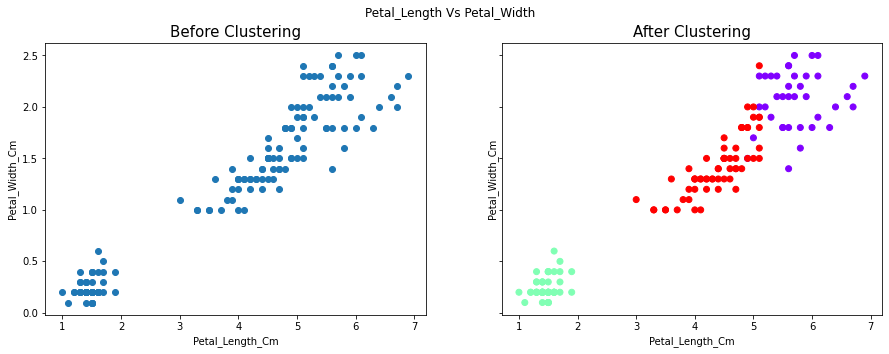

In [16]:
#Visualizing Pedal_Length Vs Pedal_Width 
f, (ax3, ax4) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
f.suptitle('Petal_Length Vs Petal_Width')

ax3.scatter(data['PetalLengthCm'], data['PetalWidthCm'])
ax3.set_title('Before Clustering', size=15)
ax3.set(xlabel='Petal_Length_Cm', ylabel='Petal_Width_Cm')

ax4.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c=Cluster_table['Clusters'], cmap='rainbow')
ax4.set_title('After Clustering', size=15)
ax4.set(xlabel='Petal_Length_Cm', ylabel='Petal_Width_Cm')